<a href="https://colab.research.google.com/github/vandislav/data_science_practicum/blob/main/quotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [3]:
tokenizer = Tokenizer()

data = open('/content/quotes-way-way-way-shortened.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'to': 2, 'of': 3, 'i': 4, 'and': 5, 'a': 6, 'is': 7, 'alone': 8, 'age': 9, 'in': 10, 'that': 11, 'you': 12, 'it': 13, 'be': 14, 'my': 15, 'for': 16, 'are': 17, 'not': 18, 'with': 19, 'have': 20, 'but': 21, 'we': 22, 'was': 23, 'at': 24, 'as': 25, 'when': 26, 'on': 27, 'can': 28, 'all': 29, 'people': 30, 'or': 31, 'an': 32, 'me': 33, 'so': 34, "it's": 35, 'by': 36, 'this': 37, 'old': 38, "i'm": 39, 'if': 40, 'what': 41, 'do': 42, 'they': 43, 'who': 44, 'your': 45, 'one': 46, 'no': 47, 'our': 48, 'like': 49, 'there': 50, 'from': 51, 'think': 52, "don't": 53, 'more': 54, 'about': 55, 'being': 56, 'amazing': 57, 'life': 58, 'time': 59, 'has': 60, 'very': 61, 'he': 62, 'just': 63, 'will': 64, 'man': 65, 'up': 66, 'get': 67, 'because': 68, 'which': 69, 'would': 70, 'than': 71, 'their': 72, 'out': 73, "you're": 74, 'world': 75, 'love': 76, 'never': 77, 'know': 78, 'them': 79, 'really': 80, 'feel': 81, 'only': 82, 'his': 83, 'had': 84, 'want': 85, 'young': 86, 'how': 87, 'always': 8

In [4]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print()

In [ ]:
print(xs[6])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   23    7   28 1377    2  174  166]


In [ ]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   23    7   28 1377    2  174]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
print(tokenizer.word_index)

{'the': 1, 'of': 2, 'to': 3, 'and': 4, 'a': 5, 'i': 6, 'is': 7, 'in': 8, 'that': 9, 'it': 10, 'you': 11, 'be': 12, 'for': 13, 'my': 14, 'have': 15, 'art': 16, 'with': 17, 'not': 18, 'are': 19, 'but': 20, 'alone': 21, 'beauty': 22, 'age': 23, 'was': 24, 'amazing': 25, 'as': 26, 'we': 27, 'an': 28, 'all': 29, 'on': 30, 'best': 31, "it's": 32, 'can': 33, 'when': 34, 'at': 35, 'or': 36, 'people': 37, 'what': 38, 'me': 39, 'so': 40, 'do': 41, 'like': 42, 'your': 43, 'they': 44, 'if': 45, 'one': 46, 'has': 47, 'this': 48, 'think': 49, 'about': 50, 'who': 51, 'from': 52, 'life': 53, 'by': 54, 'there': 55, "i'm": 56, 'attitude': 57, 'our': 58, 'just': 59, 'more': 60, "don't": 61, 'no': 62, 'he': 63, 'love': 64, 'which': 65, 'very': 66, 'time': 67, 'because': 68, 'will': 69, 'their': 70, 'out': 71, 'world': 72, 'than': 73, 'always': 74, 'get': 75, 'them': 76, 'work': 77, 'up': 78, 'being': 79, 'really': 80, 'way': 81, 'his': 82, 'good': 83, 'most': 84, 'only': 85, 'anger': 86, 'never': 87, 'kno

In [7]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=20, verbose=1)
#print model.summary()
print(model)


Epoch 1/20
1706/1706 [==============================] - 73s 41ms/step - loss: 6.2401 - accuracy: 0.1031
Epoch 2/20
1706/1706 [==============================] - 68s 40ms/step - loss: 5.4417 - accuracy: 0.1444
Epoch 3/20
1706/1706 [==============================] - 69s 40ms/step - loss: 4.8618 - accuracy: 0.1657
Epoch 4/20
1706/1706 [==============================] - 69s 40ms/step - loss: 4.3299 - accuracy: 0.1931
Epoch 5/20
1706/1706 [==============================] - 68s 40ms/step - loss: 3.8915 - accuracy: 0.2276
Epoch 6/20
1706/1706 [==============================] - 69s 40ms/step - loss: 3.5869 - accuracy: 0.2571
Epoch 7/20
1706/1706 [==============================] - 69s 40ms/step - loss: 3.3640 - accuracy: 0.2807
Epoch 8/20
1706/1706 [==============================] - 68s 40ms/step - loss: 3.2080 - accuracy: 0.3011
Epoch 9/20
1706/1706 [==============================] - 68s 40ms/step - loss: 3.0890 - accuracy: 0.3192
Epoch 10/20
1706/1706 [==============================] - 68s 40m

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

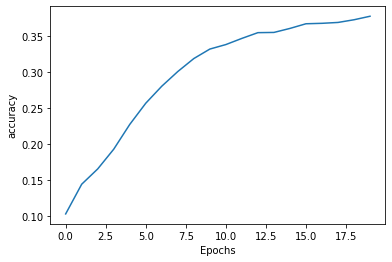

In [9]:
plot_graphs(history, 'accuracy')


In [29]:
seed_text = "A mistake is"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict(token_list)
  classes_x = np.argmax(predicted> 0.5).astype("int32"))
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == classes_x:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

IndentationError: ignored

In [ ]:
seed_text = "What is man's ultimate direction in life?"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predicted = model.predict(token_list)
  classes_x = np.argmax(predicted> 0.5).astype("int32"))
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == classes_x:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)